In [132]:
# 1. Preprocess
import random
# 1.1. Make NeuralLetwork
# 1.1.1. Define Layers
n_hidden = 2
n_layer = n_hidden + 2

# 1.1.2. Define Units
n_unit_i = 7 * 7 + 1
n_unit_h = 20 # all 
n_unit_o = 10

unit_i = [0 for u in range(n_unit_i)]
unit_h1 = [0 for u in range(n_unit_h)]
unit_h2 = [0 for u in range(n_unit_h)]
unit_o = [0 for u in range(n_unit_o)]

# 1.1.3. Initialize weight
w1 = [[random.uniform(-1, 1) for u_before in range(n_unit_i)] for u_after in range(n_unit_h)]
w2 = [[random.uniform(-1, 1) for u_before in range(n_unit_h)] for u_after in range(n_unit_h)]
w3 = [[random.uniform(-1, 1) for u_before in range(n_unit_h)] for u_after in range(n_unit_o)]

In [133]:
# 1.2. Define dataset

import mydatasets

n_data = 100
ipt = mydatasets.inputdata("digit")
res = ipt.load_data2(size=(7, 7), num=n_data)

train = res[0][0]
for k in train:
    for n in k:
        n.insert(0, 1)

"""
teach = res[0][1]
teach2 = []
for t in teach:
    buf = []
    for o in range(n_unit_o):
        if t == o:
            buf.append(1) 
        else:
            buf.append(0)
    teach2.append(buf)
"""
def maketeach(kind):
    buf = []
    for o in range(n_unit_o):
        if o == kind:
            buf.append(1) 
        else:
            buf.append(0)
    return buf

In [134]:
"""
# 1.3 Implement forward propagation
import math

# 1.3.1 Define activation fucntion
def sigmoid(z):
    if z > 10: return 0.99999
    elif z < -10: return 0.00001
    else: return 1 / (1 + math.exp(-1 * z))

# ReLU
def ReLU(z):
    if z > 0: return z
    else: return 0
    
# softmax
def softmax(unit_o_k):
    m = 0.
    for o in range(n_unit_o):
        m += math.exp(unit_o[o])
    return math.exp(unit_o_k)/m
    
# 1.3.2 forward propagation
def forward(train_vec):
    
    for i in range(n_unit_i):
        unit_i[i] = train_vec[i]
    unit_i[0] = 1
        
    # 1.3.2.1 forward between input-hidden1
    for h1 in range(n_unit_h):
        buf = 0
        for i in range(n_unit_i):
            buf += unit_i[i] * w1[h1][i]
        unit_h1[h1] = ReLU(buf)
    unit_h1[0] = 1
        
    # 1.3.2.2 forward between hidden1-hidden2
    for h2 in range(n_unit_h):
        buf = 0
        for h1 in range(n_unit_h):
            buf += unit_h1[h1] * w2[h2][h1]
        unit_h2[h2] = ReLU(buf)
    unit_h2[0] = 1

    # 1.3.2.3 forward between hidden2-output
    for o in range(n_unit_o):
        buf = 0
        for h2 in range(n_unit_h):
            buf += unit_h2[h2] * w3[o][h2]
        unit_o[o] = buf
    for o in range(n_unit_o):
        unit_o[o] = softmax(unit_o[o])
"""
# 1.3 Implement forward propagation
import math

# 1.3.1 Define activation fucntion
def sigmoid(z):
    if z > 10: return 0.99999
    elif z < -10: return 0.00001
    else: return 1 / (1 + math.exp(-1 * z))
    
# 1.3.2 forward propagation

def forward(train_vec):
    
    for i in range(n_unit_i):
        unit_i[i] = train_vec[i]
    unit_i[0] = 1
        
    # 1.3.2.1 forward between input-hidden1
    for h1 in range(n_unit_h):
        buf = 0
        for i in range(n_unit_i):
            buf += unit_i[i] * w1[h1][i]
        unit_h1[h1] = sigmoid(buf)
    unit_h1[0] = 1
        
    # 1.3.2.2 forward between hidden1-hidden2
    for h2 in range(n_unit_h):
        buf = 0
        for h1 in range(n_unit_h):
            buf += unit_h1[h1] * w2[h2][h1]
        unit_h2[h2] = sigmoid(buf)
    unit_h2[0] = 1

    # 1.3.2.3 forward between hidden2-output
    for o in range(n_unit_o):
        buf = 0
        for h2 in range(n_unit_h):
            buf += unit_h2[h2] * w3[o][h2]
        unit_o[o] = sigmoid(buf)


In [135]:
"""
# 1.3.3 back propagation

# momentum
mom = [0 for m in range(3)]
hyper = 0.1
alpha = [0.01, 0.01, 0.01]

def backpropagation(teach_vec):
    
    # 1.3.3.1 get cost
    buf = 0
    for o in range(n_unit_o):
        buf += (teach_vec[o] - unit_o[o]) ** 2
    cost = buf / 2
    
    # 1.3.3.2 get grad between hidden2-output
    for o in range(n_unit_o):
        for h2 in range(n_unit_h):
            delta = (unit_o[o] - teach_vec[o]) * unit_o[o] * (1 - unit_o[o]) * unit_h2[h2] + hyper * mom[2]
            mom[2] = delta
            w3[o][h2] -= alpha[2] * delta
            
    # 1.3.3.3 get grad
    for o in range(n_unit_o):
        for h2 in range(n_unit_h):
            for h1 in range(n_unit_h):
                if unit_h2[h2] > 0: d_relu_2 = 1
                else: d_relu_2 = 0
                delta = ((unit_o[o] - teach_vec[o]) * unit_o[o] * (1 - unit_o[o])
                         * w3[o][h2] * d_relu_2 * unit_h1[h1] + hyper * mom[1])
                mom[1] = delta
                w2[h2][h1] -= alpha[1] * delta
                
    # 1.3.3.4 get grad
    for o in range(n_unit_o):
        for h2 in range(n_unit_h):
            for h1 in range(n_unit_h):
                for i in range(n_unit_i):
                    if unit_h2[h2] > 0: d_relu_2 = 1
                    else: d_relu_2 = 0
                    if unit_h1[h1] > 0: d_relu_1 = 1
                    else: d_relu_1 = 0
                    delta = ((unit_o[o] - teach_vec[o]) * unit_o[o] * (1 - unit_o[o])
                             * w3[o][h2] * d_relu_2
                             * w2[h2][h1] * d_relu_1 * unit_i[i] + hyper * mom[0])
                    mom[0] = delta
                    w1[h1][i] -= alpha[0] *delta
                    
    return cost
"""
# 1.3.3 back propagation

alpha = 0.1
def backpropagation(teach_vec):
    
    # 1.3.3.1 get cost
    buf = 0
    for o in range(n_unit_o):
        buf += (teach_vec[o] - unit_o[o]) ** 2
    cost = buf / 2
    
    # 1.3.3.2 get grad between hidden2-output
    for o in range(n_unit_o):
        for h2 in range(n_unit_h):
            delta = (unit_o[o] - teach_vec[o]) * unit_o[o] * (1 - unit_o[o]) * unit_h2[h2]
            w3[o][h2] -= alpha * delta
            
    # 1.3.3.3 get grad
    for o in range(n_unit_o):
        for h2 in range(n_unit_h):
            for h1 in range(n_unit_h):
                delta = ((unit_o[o] - teach_vec[o]) * unit_o[o] * (1 - unit_o[o])
                         * w3[o][h2] * unit_h2[h2] * (1 - unit_h2[h2]) * unit_h1[h1])
                w2[h2][h1] -= alpha * delta
                
    # 1.3.3.4 get grad
    for o in range(n_unit_o):
        for h2 in range(n_unit_h):
            for h1 in range(n_unit_h):
                for i in range(n_unit_i):
                    delta = ((unit_o[o] - teach_vec[o]) * unit_o[o] * (1 - unit_o[o])
                             * w3[o][h2] * unit_h2[h2] * (1 - unit_h2[h2])
                             * w2[h2][h1] * unit_h1[h1] * (1 -unit_h1[h1]) * unit_i[i])
                    w1[h1][i] -= alpha *delta
                    
    return cost

Backpropagation training is started now.
learn num: 0
learn num: 100
learn num: 200
learn num: 300
learn num: 400
learn num: 500
learn num: 600
learn num: 700
learn num: 800
learn num: 900
learn num: 1000
learn num: 1100
learn num: 1200
learn num: 1300
learn num: 1400
learn num: 1500
learn num: 1600
learn num: 1700
learn num: 1800
learn num: 1900
learn num: 2000
learn num: 2100
learn num: 2200
learn num: 2300
learn num: 2400
learn num: 2500
learn num: 2600
learn num: 2700
learn num: 2800
learn num: 2900
learn num: 3000
learn num: 3100
learn num: 3200
learn num: 3300
learn num: 3400
learn num: 3500
learn num: 3600
learn num: 3700
learn num: 3800
learn num: 3900
learn num: 4000
learn num: 4100
learn num: 4200
learn num: 4300
learn num: 4400
learn num: 4500
learn num: 4600
learn num: 4700
learn num: 4800
learn num: 4900
learn num: 5000
learn num: 5100
learn num: 5200
learn num: 5300
learn num: 5400
learn num: 5500
learn num: 5600
learn num: 5700
learn num: 5800
learn num: 5900
learn num: 

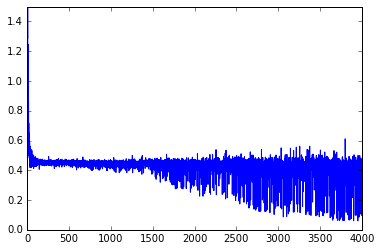

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
plt_x = []
plt_y = []

n_epoch = 30
n_train = len(train)
n_kind = 10
n = 0
error_threshold = 0.001

print("Backpropagation training is started now.")

def training(n):
    for e in range(n_epoch):
        for d in range(n_data):
            for k in range(n_kind):
                try:
                    forward(train[k][d])
                    c = backpropagation(maketeach(k))
                    plt_x.append(n)
                    plt_y.append(c)
                    if n % 100 == 0:
                        print("learn num: {0}".format(n))
                    if c < error_threshold and e > n_epoch // 2:
                        print("cost is least than error threshold. (n: {})".format(n))
                        return 1
                    # for get log
                    with open("logfile.csv", "a") as f:
                        strOut = "{}, {}, {}\n".format(str(train[k][d]), str(maketeach(k)), c)
                        f.write(strOut)
                except Exception as e:
                    print("n:{}, d:{}, k{}, Error:{}".format(n, d, k, e.args))
                    pass
                finally:
                    n += 1
    return 0

training(n)
plt.plot(plt_x, plt_y)
plt.xlim(0, 4000)
plt.ylim(0, 1.5)
plt.show()

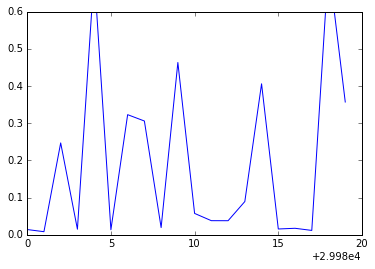

In [137]:
plt.plot(plt_x, plt_y)
plt.xlim(29980, 30000)
plt.ylim(0.0, 0.6)
plt.show()

In [109]:
def forecast(train_data, dim, printflag=True, d=0, k=0):
    forward(train_data)
    res = unit_o
    n = 0
    for r in res:
        if r == max(res):
            max_score = n
        n += 1
    if printflag:
        print("max score : {}".format(max_score))
        print("scores is below : ")
        print(res)
    
    import numpy as np
    import cv2
    mat = []
    row = []
    cnt = 0
    n = 0
    for t in range(1, len(train_data)):
        row.append(train_data[t])
        cnt += 1
        n += 1
        if cnt == 7:
            #print("if statement is called at n:{}".format(n))
            mat.append(row)
            row = []
            cnt = 0
    cv2.imwrite('output/forecast_input_{}_{}.png'.format(k, d), np.array(mat)*255)
    
    return max_score

In [72]:
forecast(train[9][4], 7)

max score : 9
scores is below : 
[0.0025071146062640485, 0.11216723401121306, 0.037997667030089624, 0.004899435716957241, 0.18656923981462248, 0.04815443893900053, 0.0838650278922355, 0.15626952963874266, 0.08222181152314238, 0.5237068410789307]


9

In [79]:
def validation(vaild_sets):
    n_dim = 7
    correct = 0
    incorrect = 0
    n_kind = 10
    ary_correct = [0 for i in range(10)]
    ary_hit_kind = [0 for i in range(10)]
    for d in range(n_data):
        for k in range(n_kind):
            ans = forecast(train[k][d], n_dim, printflag=False, d=d, k=k)
            if ans == k:
                correct += 1
                ary_correct[k] += 1
            else:
                incorrect += 1
            ary_hit_kind[ans] += 1
            
    total = correct + incorrect
    print("validation result:: correct answer is {} / {}".format(correct, total))
    print("ary_correct::")
    print(ary_correct)
    print("ary_hit_kind::")
    print(ary_hit_kind)

In [76]:
valid = res[1][0]
for k in valid:
    for n in k:
        n.insert(0, 1)

In [110]:
validation(valid)

validation result:: correct answer is 696 / 1000
ary_correct::
[89, 92, 59, 76, 59, 27, 78, 84, 73, 59]
ary_hit_kind::
[111, 119, 78, 112, 102, 35, 134, 103, 108, 98]


In [26]:
forecast(train[5][99], 7)

max score : 8
scores is below : 
[0.1494263393763942, 0.13193514703792816, 0.08439301373298627, 0.0903124798599886, 0.08708699294559412, 0.1170024751289711, 0.1088718956632737, 0.086675810554991, 0.15898169611349391, 0.09700618346070897]


8

In [143]:
ary_plt_y = [[] for i in range(10)]
for i in range(3000):
    for j in range(10):
        ary_plt_y[j].append(plt_y[i*10+j])

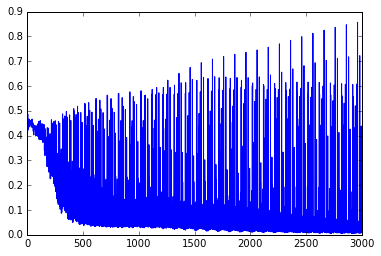

In [147]:
plt.plot(plt_x[0:3000], ary_plt_y[0][:3000])
plt.xlim(0, 3000)
plt.ylim(0.0, 0.9)
xticks = [970+i*2 for i in range(15)]
xticks_label = [str(970+i*2) for i in range(15)]
#plt.xticks(xticks, xticks_label)
plt.show()